In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# from plot_ICL import *

In [2]:
!pip install cmocean

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 223 kB 4.3 MB/s            


In [3]:
# import cmocean


### This is the official file with the snow height measurements above all the IceTop tanks

In [19]:
#snow_file = "/data/user/jsaffer/Data/IT81-MasterwithSnowMeasurements-Feb2022.csv"
# snow_file = "/data/ana/CosmicRay/IceTop_level3/snow/IT81-MasterwithSnowMeasurements-Mar2023.csv"
# snow_file = "/home/narayan/research/analysis/triggerStudy/snowDepth/IT81-MasterwithSnowMeasurements-Mar2023.csv"
snow_file = "/home/narayan/research/analysis/triggerStudy/snowDepth/IT81-MasterwithSnowMeasurements-Feb2024.csv"
snow = pd.read_csv(snow_file, skiprows=2)
snow.replace({'-':np.nan}, inplace=True)
snow = snow.astype({'1-Apr-16': 'float64'}) # there are measurements missing in Apr 2016 which messes with the data type of that column
snow.drop(columns='Unnamed: 9', inplace=True) # there is an empty column that can be removed

In [20]:
snow

,station & tank,Station,Tank,DeployYear,Tank liner,DeployOrder,X,Y,Z,10-Jan-08,...,23-Nov-19,12-Mar-20,10-Dec-20,5-Mar-21,15-Nov-21,23-Feb-22,23-Nov-22,11-Mar-23,23-Nov-23,6-Feb-24
0,01A,1,A,2011,Zirco,76,-265.58,-497.61,1944.70,NaN,...,2.200,2.178,2.340,2.420,2.570,2.570,2.879,2.799,3.106,3.094
1,01B,1,B,2011,Zirco,76,-255.76,-495.79,1944.75,NaN,...,2.237,2.238,2.247,2.317,2.387,2.400,2.774,2.749,3.052,3.051
2,02A,2,A,2009,Zirco,55,-140.41,-477.48,1945.24,NaN,...,1.577,1.501,1.593,1.663,1.761,1.763,1.923,1.923,2.008,2.085
3,02B,2,B,2009,Zirco,55,-130.66,-476.29,1945.22,NaN,...,1.400,1.501,1.513,1.583,1.654,1.730,1.940,1.948,2.167,2.147
4,03A,3,A,2009,Zirco,56,-27.90,-464.26,1945.41,NaN,...,1.553,1.553,1.669,1.709,1.870,1.854,1.935,1.908,2.092,2.149
5,03B,3,B,2009,Zirco,56,-20.55,-458.73,1945.28,NaN,...,1.517,1.567,1.823,1.813,2.008,1.983,2.093,2.091,2.093,2.133
6,04A,4,A,2009,Zirco,51,105.60,-438.42,1945.15,NaN,...,1.744,1.693,1.807,1.817,2.000,2.070,2.176,2.210,2.438,2.430
7,04B,4,B,2009,Zirco,51,115.20,-436.58,1945.38,NaN,...,1.467,1.467,1.650,1.650,1.775,1.835,1.907,1.941,2.171,2.166
8,05A,5,A,2009,Zirco,52,214.50,-432.25,1945.32,NaN,...,1.259,1.289,1.279,1.319,1.334,1.394,1.581,1.674,1.672,1.689
9,05B,5,B,2009,Zirco,52,219.66,-424.53,1945.46,NaN,...,1.001,1.124,1.111,1.161,1.254,1.316,1.385,1.433,1.491,1.537


### For interpolating the snow height it makes sense to take averages within the stations

In [21]:
snow_avg = pd.DataFrame({'Station':int(len(snow)/2)*[0], 'X':int(len(snow)/2)*[0], 'Y':int(len(snow)/2)*[0], 'Z':int(len(snow)/2)*[0]})

for col in snow.columns:
    if '-' in col and int(col[-2:])>11:
        snow_avg.insert(loc=len(snow_avg.columns), column=col, value=int(len(snow)/2)*[0])

for i in range(int(len(snow)/2)):
    snow_avg['Station'][i] = i+1
    snow_avg['X'][i] = (snow['X'][i*2]+snow['X'][i*2+1])/2
    snow_avg['Y'][i] = (snow['Y'][i*2]+snow['Y'][i*2+1])/2
    snow_avg['Z'][i] = (snow['Z'][i*2]+snow['Z'][i*2+1])/2
    for col in snow.columns:
        if '-' in col and int(col[-2:])>11:
            snow_avg[col][i] = (snow[col][i*2]+snow[col][i*2+1])/2
    
snow_avg

/home/narayan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/narayan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/narayan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/narayan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 


,Station,X,Y,Z,19-Feb-12,21-Oct-12,9-Jan-13,21-Feb-13,25-Oct-13,11-Dec-13,...,23-Nov-19,12-Mar-20,10-Dec-20,5-Mar-21,15-Nov-21,23-Feb-22,23-Nov-22,11-Mar-23,23-Nov-23,6-Feb-24
0,1,-260,-496,1944,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,3,3
1,2,-135,-476,1945,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,2
2,3,-24,-461,1945,0,0,0,0,0,0,...,1,1,1,1,1,1,2,1,2,2
3,4,110,-437,1945,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
4,5,217,-428,1945,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,6,361,-397,1946,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
6,7,-339,-399,1945,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,2,2
7,8,-227,-385,1945,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,3,3
8,9,-80,-360,1944,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,2
9,10,29,-340,1945,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


## Snow comparison 2012 vs 2018

In [22]:
station_list = []
snow_2012_list = []
snow_2018_list = []

for index, station in enumerate(snow_avg.Station):
    station_list.append(station)
    snow_2012_list.append(snow['21-Oct-12'][index])
    snow_2018_list.append(snow['4-Nov-18'][index])

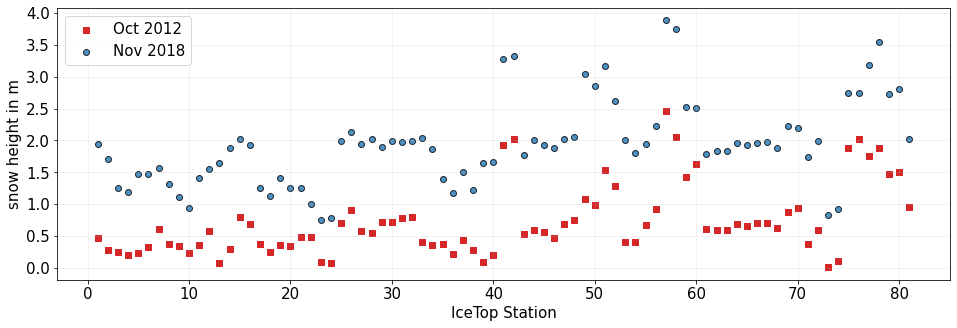

In [23]:
fig = plt.figure(figsize=(16,5))
ax = plt.subplot()

ax.scatter(station_list, snow_2012_list, label='Oct 2012', marker='s', color='C3')
ax.scatter(station_list, snow_2018_list, label='Nov 2018', edgecolor='k', alpha=0.8, color='C0')

ax.set_xlabel('IceTop Station', fontsize=15)
ax.set_ylabel('snow height in m', fontsize=15)
ax.legend(fontsize=15)
ax.tick_params(labelsize=15)
ax.grid(alpha=.2)

plt.show()

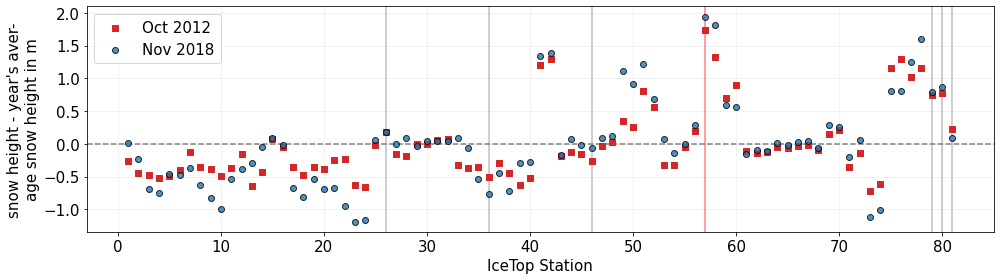

In [24]:
fig = plt.figure(figsize=(14,4))
ax = plt.subplot()

ax.axhline(y=0, color='grey', ls='dashed')
ax.axvline(x=26, color='grey', alpha=0.5)
ax.axvline(x=36, color='grey', alpha=0.5)
ax.axvline(x=46, color='grey', alpha=0.5)
ax.axvline(x=57, color='red', alpha=0.5)
ax.axvline(x=79, color='grey', alpha=0.5)
ax.axvline(x=80, color='grey', alpha=0.5)
ax.axvline(x=81, color='grey', alpha=0.5)

ax.scatter(station_list, np.array(snow_2012_list)-np.mean(snow_2012_list), label='Oct 2012', marker='s', color='C3', zorder=10)
ax.scatter(station_list, np.array(snow_2018_list)-np.mean(snow_2018_list), label='Nov 2018', edgecolor='k', alpha=0.8, color='C0', zorder=11)


ax.set_xlabel('IceTop Station', fontsize=15)
ax.set_ylabel("snow height - year's aver-\nage snow height in m", fontsize=15)
ax.legend(fontsize=15)
ax.tick_params(labelsize=15)
ax.grid(alpha=.2)
plt.tight_layout()

#plt.savefig('/data/user/jsaffer/Plots/snow_heights_2012_2018.png')

plt.show()

## IceTop stations with deployment year

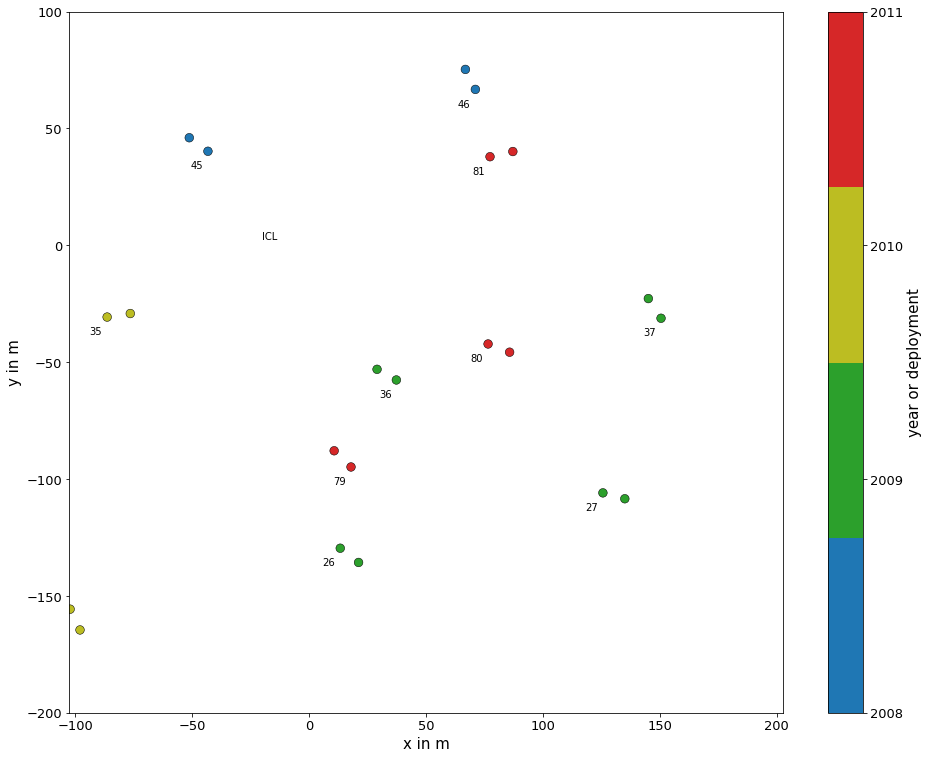

In [25]:
# plt.style.use('~/style.txt')

fig = plt.figure(figsize=(16,12.9))
ax = plt.subplot()
ax.axis('equal')

fs=15

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["C0", "C2", "C8", "C3"])

sc = ax.scatter(snow.X, snow.Y, c=snow.DeployYear, cmap=cmap, edgecolors='black', s=75, linewidth=0.5, vmin=2008)
for i in [50, 52, 68, 70, 72, 88, 90, 156, 158, 160]:
    if snow.Tank[i] == 'A':
        ax.text(snow.X[i]-7.5, snow.Y[i]-7.5, snow.Station[i])
        
ax.text(-20, 2.5, 'ICL')

# plot_ICL(ax)
#ax.spines.right.set_visible(False)
#ax.spines.top.set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=fs-2)
ax.set_xlabel('x in m', size=fs)
ax.set_ylabel('y in m', size=fs)
ax.set_xlim(-100, 200)
ax.set_ylim(-200, 100)
#ax.axis('equal')
cb = plt.colorbar(sc)
cb.set_ticks([2008, 2009, 2010, 2011])
cb.set_label(label='year or deployment', size=fs)
cb.ax.tick_params(labelsize=fs-2)

#plt.savefig('/data/user/jsaffer/Plots/IceTop_map_deployment_years_InFill.png', dpi=300)

plt.show()

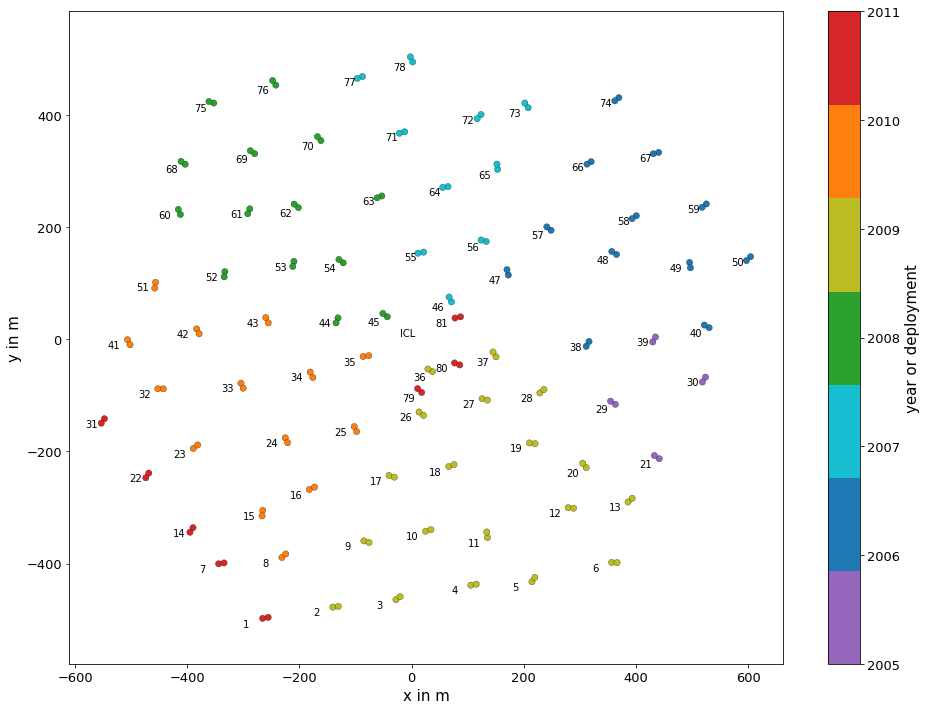

In [26]:
# plt.style.use('~/style.txt')

fig = plt.figure(figsize=(16,12))
ax = plt.subplot()
ax.axis('equal')

fs=15

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["C4", "C0", "C9", "C2", "C8", "C1", "C3"])

sc = ax.scatter(snow.X, snow.Y, c=snow.DeployYear, cmap=cmap, edgecolors='black', s=40, linewidth=0.25)
for i in range(len(snow)):
    if snow.Tank[i] == 'A':
        ax.text(snow.X[i]-35, snow.Y[i]-15, snow.Station[i])
        
ax.text(-20, 5, 'ICL')

# plot_ICL(ax)
#ax.spines.right.set_visible(False)
#ax.spines.top.set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=fs-2)
ax.set_xlabel('x in m', size=fs)
ax.set_ylabel('y in m', size=fs)
ax.axis('equal')
cb = plt.colorbar(sc)
cb.set_label(label='year or deployment', size=fs)
cb.ax.tick_params(labelsize=fs-2)

#plt.savefig('/data/user/jsaffer/Plots/IceTop_map_deployment_years.png', dpi=300)

plt.show()

### Snow height measurements at the InFill tanks over time

/usr/lib/python3/dist-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)
/usr/lib/python3/dist-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)
/usr/lib/python3/dist-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)
/usr/lib/python3/dist-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two mino

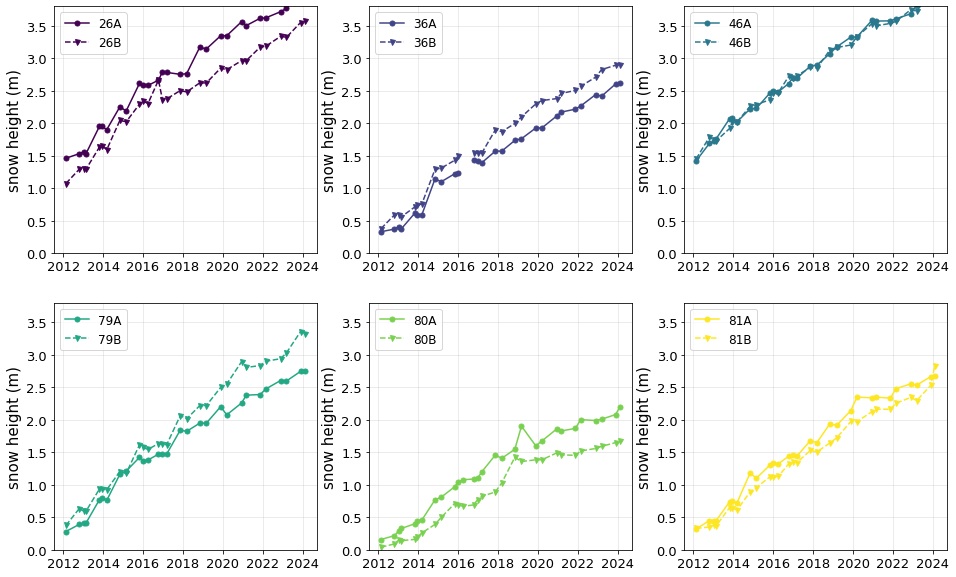

In [27]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#plt.suptitle('InFill station snow height measurements', fontsize=fs)

axs = [ax1, ax2, ax3, ax4, ax5, ax6]
stations = [26, 36, 46, 79, 80, 81]
colors = ['#440154', '#414487', '#2A788E', '#22A884', '#7AD151', '#FDE725']

for i in range(6):
    ax = axs[i]
    ax.tick_params(axis='both', which='major', labelsize=fs-2)
    ax.plot(pd.to_datetime(snow.keys()[16:]), snow[snow["station & tank"] == str(stations[i])+"A"].values[0][16:], 'o-',  markersize=5, color=colors[i], label=str(stations[i])+'A')
    ax.plot(pd.to_datetime(snow.keys()[16:]), snow[snow["station & tank"] == str(stations[i])+"B"].values[0][16:], 'v--', markersize=5, color=colors[i], label=str(stations[i])+'B')
    ax.set_ylabel('snow height (m)', size=fs)
    ax.set_ylim(0, 3.8)
    ax.legend(loc='upper left', fontsize=fs-3)
    ax.grid(alpha=0.3)

plt.show()

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from astropy.time import Time

t = pd.to_datetime(snow.keys()[16:])

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False, elev=30, azim=240)
fig.add_axes(ax)

for station in range(1, 79):
    ax.plot((station-0.2)*np.ones(len(snow[snow["station & tank"] == f"{station:02d}A"].values[0][16:])), Time(t).mjd, snow[snow["station & tank"] == f"{station:02d}A"].values[0][16:], '-', color='C0')
    ax.plot((station+0.2)*np.ones(len(snow[snow["station & tank"] == f"{station:02d}B"].values[0][16:])), Time(t).mjd, snow[snow["station & tank"] == f"{station:02d}B"].values[0][16:], '-', color='C9')
          
plt.show()

ModuleNotFoundError: No module named 'astropy'

### Snow height map for a certain time

AttributeError: 'collections.OrderedDict' object has no attribute 'bottom'

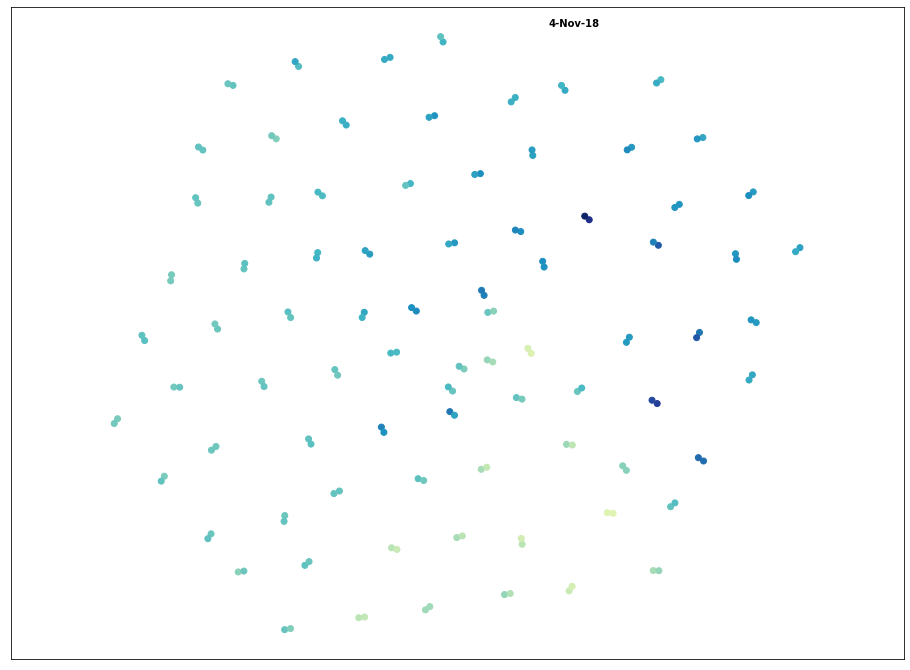

In [29]:
fs=15

fig = plt.figure(figsize=(16,12))
ax = plt.subplot()
# plot_ICL(ax)
# plot_DSL(ax)
# plot_MAPO(ax)
# plot_B61(ax)
ax.text(180, 520, snow.iloc[:,33].name, weight='bold')
sc = ax.scatter(snow.X, snow.Y, c=snow.iloc[:,33], cmap="YlGnBu", vmin=0, vmax=4.6)
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.grid(False)
cb = fig.colorbar(sc)

plt.show()

### One way of interpolating is using bivariate splines...

In [30]:
from scipy.interpolate import SmoothBivariateSpline

meas_index = 22

sbs = SmoothBivariateSpline(snow.X, snow.Y, snow.iloc[:,meas_index])

X = np.linspace(-600, 650, 500)
Y = np.linspace(-600, 600, 500)
X, Y = np.meshgrid(X, Y)

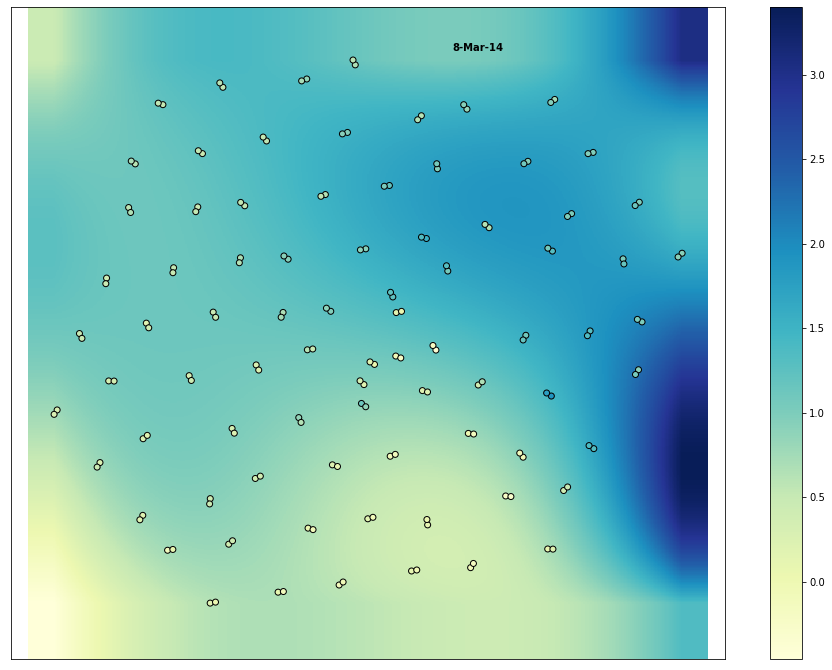

In [31]:
fs=15

fig = plt.figure(figsize=(16,12))
ax = plt.subplot()
ax.text(180, 520, snow.iloc[:,meas_index].name, weight='bold')
sc = plt.pcolormesh(X, Y, sbs.ev(X, Y), shading='auto', cmap='YlGnBu')
ax.scatter(snow.X, snow.Y, c=snow.iloc[:,meas_index], edgecolor='black', cmap="YlGnBu", vmin=0, vmax=4.6)
# plot_ICL(ax)
ax.axis('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
# ax.spines.bottom.set_visible(False)
# ax.spines.left.set_visible(False)
# ax.spines.top.set_visible(False)
# ax.spines.right.set_visible(False)
ax.grid(False)
cb = fig.colorbar(sc)

plt.show()

### ... or with cubic interpolation

In [32]:
from scipy.interpolate import griddata

meas_index = 22

X = np.linspace(-600, 600, 1200)
Y = np.linspace(-600, 600, 1200)
X, Y = np.meshgrid(X, Y)

interpol_cubic = griddata((snow.X, snow.Y), snow.iloc[:,meas_index], (X, Y), method='cubic')

highest snow 4.931


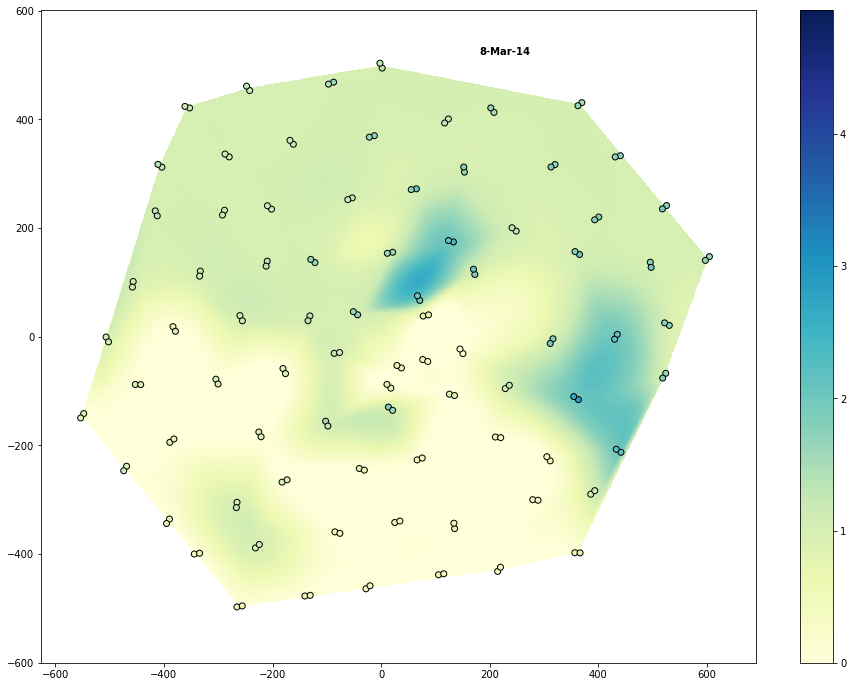

In [42]:
fs=15
highest_snow = max(snow.iloc[:,16:].values[~np.isnan(snow.iloc[:,16:])])
print("highest snow",highest_snow)

fig = plt.figure(figsize=(16,12))
ax = plt.subplot()
ax.text(180, 520, snow.iloc[:,meas_index].name, weight='bold')

plt.pcolormesh(X, Y, interpol_cubic, shading='auto', cmap='YlGnBu', vmin=0.0, vmax=highest_snow)
sc = ax.scatter(snow.X, snow.Y, c=snow.iloc[:,meas_index], edgecolor='black', cmap="YlGnBu", vmin=0.0, vmax=highest_snow)
# plot_ICL(ax)
ax.axis('equal')
ax.grid(False)
cb = fig.colorbar(sc)

plt.show()

In [45]:
snow.iloc[:,16:].values[~np.isnan(snow.iloc[:,16:])]

array([0.327, 0.467, 0.437, ..., 2.294, 2.528, 2.833])

### However, it gets more reasonable when using the averaged values for the stations

In [34]:
from scipy.interpolate import griddata

ind = meas_index - 12 # this should be the offset when comparing the snow with the snow_avg dataframe

X = np.linspace(-600, 600, 1200)
Y = np.linspace(-600, 600, 1200)
X, Y = np.meshgrid(X, Y)

interpol_cubic = griddata((snow_avg.X, snow_avg.Y), snow_avg.iloc[:,ind], (X, Y), method='cubic')

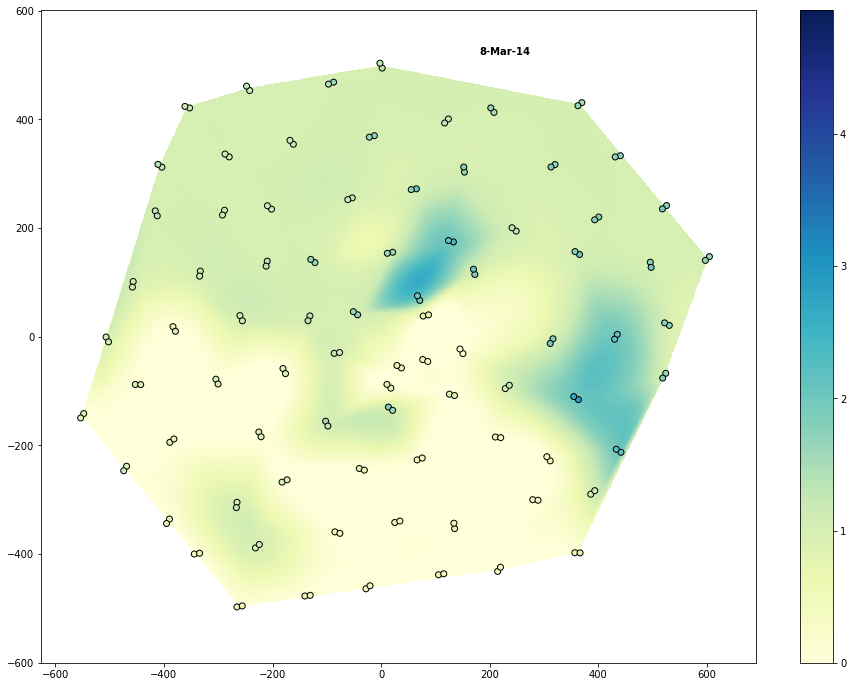

In [35]:
fs=15

fig = plt.figure(figsize=(16,12))
ax = plt.subplot()

ax.text(180, 520, snow_avg.iloc[:,ind].name, weight='bold')
plt.pcolormesh(X, Y, interpol_cubic, shading='auto', cmap='YlGnBu', vmin=0.0, vmax=highest_snow)
sc = ax.scatter(snow.X, snow.Y, c=snow.iloc[:,meas_index], edgecolor='black', cmap="YlGnBu", vmin=0.0, vmax=highest_snow)
# plot_ICL(ax)
ax.axis('equal')
ax.grid(False)
cb = fig.colorbar(sc)

plt.show()

## Map of all the snow maesurements since 2012

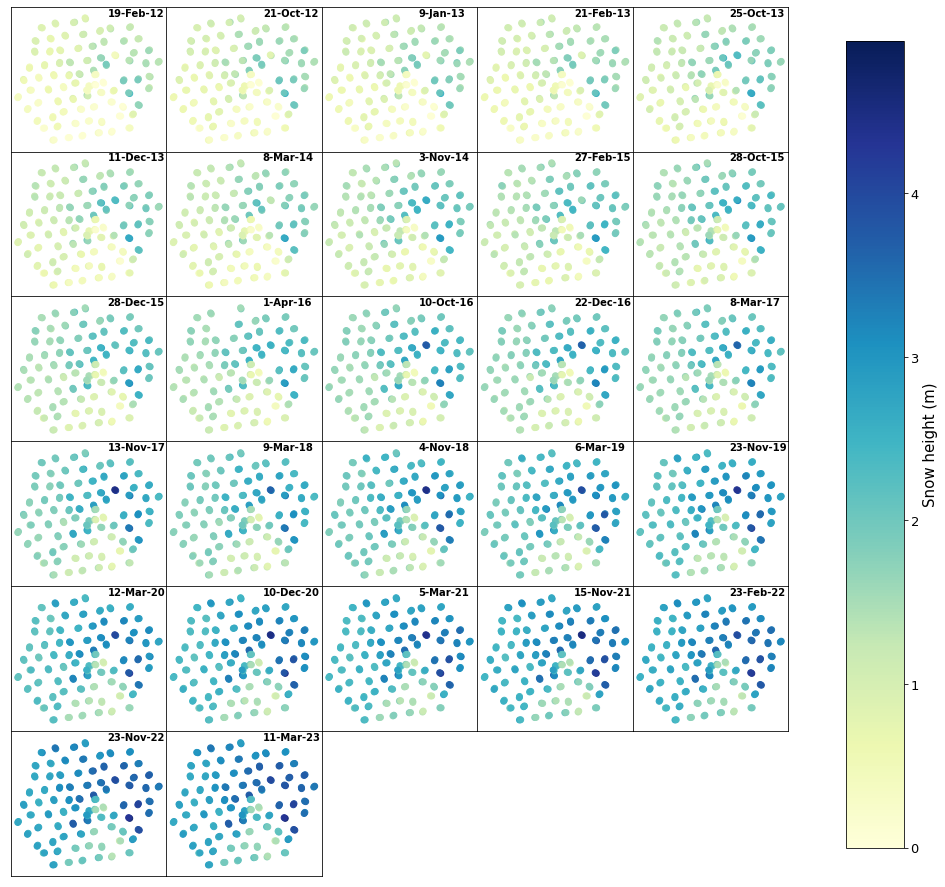

In [36]:
fs=15

fig = plt.figure(figsize=(16,16))
axs = [plt.subplot(6,5,i+1) for i in range(27)]
i=0

for ax in axs:
    ax.text(180, 520, snow.iloc[:,16+i].name, weight='bold')
    #plot_ICL(ax)
    sc = ax.scatter(snow.X, snow.Y, c=snow.iloc[:,16+i], cmap="YlGnBu", vmin=0.0, vmax=highest_snow)
    ax.axis('equal')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    i+=1

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label(label='Snow height (m)', size=fs)
cb.ax.tick_params(labelsize=fs-2)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## .. with the interpolations:

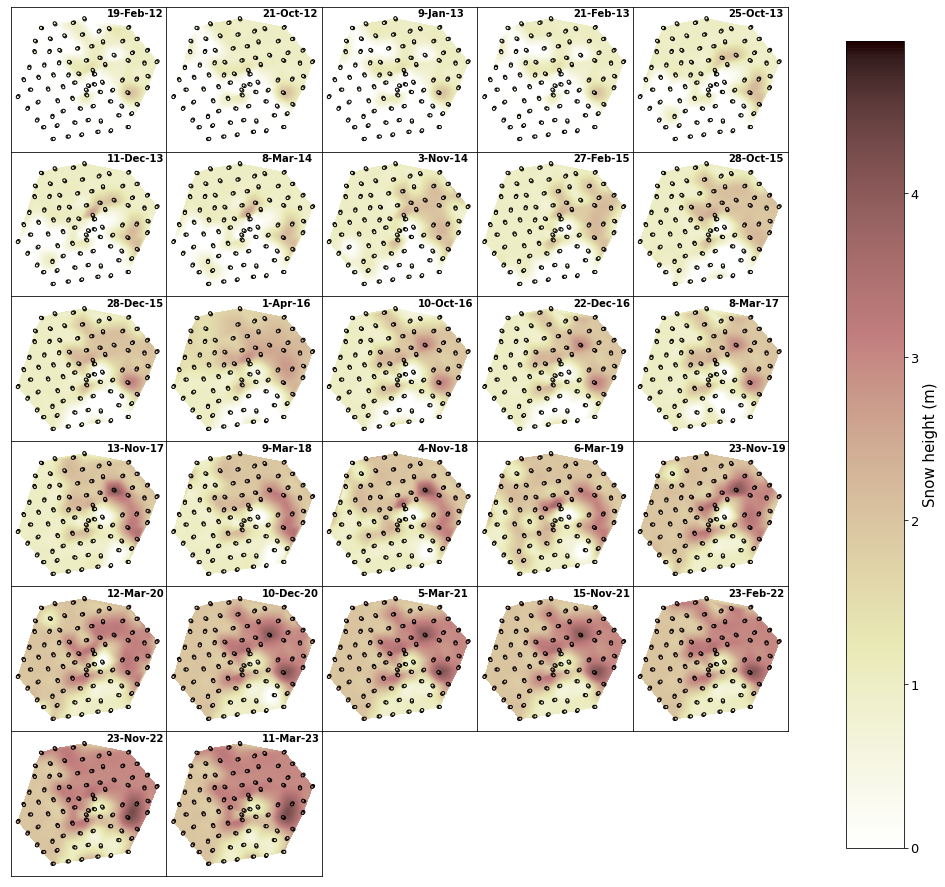

In [37]:
fs=15

fig = plt.figure(figsize=(16,16))
axs = [plt.subplot(6,5,i+1) for i in range(27)]
i=0

for ax in axs:
    ax.text(180, 520, snow.iloc[:,16+i].name, weight='bold')
    #plot_ICL(ax)
    ax.pcolormesh(X, Y, griddata((snow_avg.X[~np.isnan(snow_avg.iloc[:,4+i])], snow_avg.Y[~np.isnan(snow_avg.iloc[:,4+i])]), snow_avg.iloc[:,4+i][~np.isnan(snow_avg.iloc[:,4+i])], (X, Y), method='cubic'), shading='auto', cmap='pink_r', vmin=0.0, vmax=highest_snow)
    sc = ax.scatter(snow.X, snow.Y, c=snow.iloc[:,16+i], cmap="pink_r", edgecolor='black', s=10, vmin=0.0, vmax=highest_snow)
    ax.axis('equal')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    i+=1

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label(label='Snow height (m)', size=fs)
cb.ax.tick_params(labelsize=fs-2)

plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('/data/user/jsaffer/Plots/snow_maps_interpol.png', dpi=300)
plt.show()

In [38]:
def EN_to_ICcoords(easting, northing):
    return 0.3048*(easting-46500), 0.3048*(northing-52200)

MAPO_x, MAPO_y = EN_to_ICcoords(47723.74, 52529.27)
SPASE2_x, SPASE2_y = EN_to_ICcoords(47170.48, 51431.14)
DSL_x, DSL_y = EN_to_ICcoords(47282.46, 52999.62)
INAN1_x, INAN1_y = EN_to_ICcoords(44415.56, 53911.63)
WP09_7_x, WP09_7_y = EN_to_ICcoords(46904.98, 49860.18)
WP10_7_x, WP10_7_y = EN_to_ICcoords(45082.74, 51293.90)
WP10_8_x, WP10_8_y = EN_to_ICcoords(45544.06, 52586.56)

DSL_alt_x, DSL_alt_y = 276.563, 216.807
MAPO_alt_x, MAPO_alt_y = 390, 70

SPT_x, SPT_y = 192.6112, 269.4301 # from the old snow map plotting script https://docushare.icecube.wisc.edu/dsweb/Get/Document-78946/plot_Snow.C
B61_x, B61_y = 244, 80

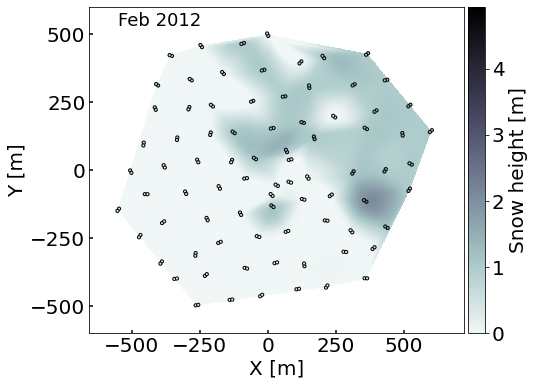

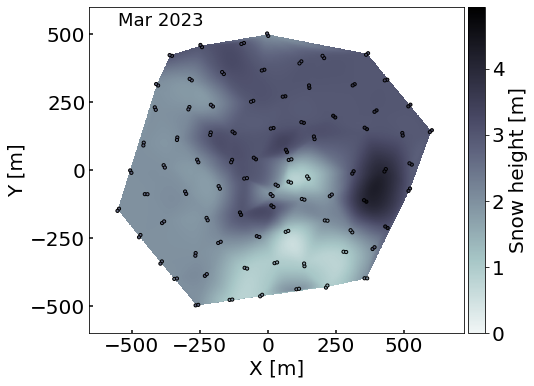

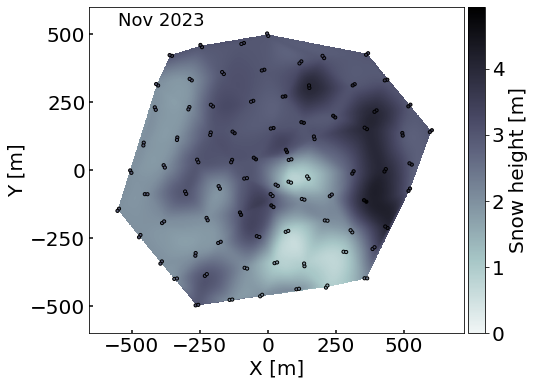

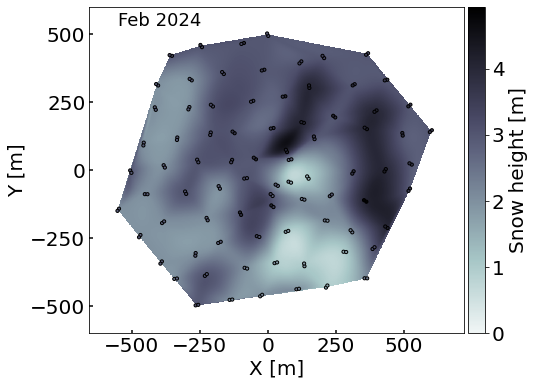

In [41]:
import matplotlib.patheffects as PathEffects
import matplotlib
min_val, max_val = 0.04,1
n = 10
orig_cmap = plt.cm.bone_r
colors = orig_cmap(np.linspace(min_val, max_val, n))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)
# import cmocean

fs=20

# colormap = 'Blues'
# colormap = 'bone_r'
colormap = cmap
# colormap = 'GnBu'
# colormap = 'ocean_r'

# for i in range(27):
for i in [0,26,27,28]:
#     fig = plt.figure(figsize=(15,12))
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot()
    ax.pcolormesh(X, Y, griddata((snow_avg.X[~np.isnan(snow_avg.iloc[:,4+i])], snow_avg.Y[~np.isnan(snow_avg.iloc[:,4+i])]), snow_avg.iloc[:,4+i][~np.isnan(snow_avg.iloc[:,4+i])], (X, Y), method='cubic'), shading='auto', cmap=colormap, vmin=0.0, vmax=highest_snow)
    sc = ax.scatter(snow.X, snow.Y, c=snow.iloc[:,16+i], cmap=colormap, edgecolor='black', s=10, vmin=0.0, vmax=highest_snow)
    if snow.columns[16+i] == '1-Apr-16': # in April 2016 three stations didn't get snow height measurements, so I need to plot the outlines of the tanks separately
        ax.scatter(snow.X[70], snow.Y[70], facecolor='white', edgecolor='black', s=10)
        ax.scatter(snow.X[71], snow.Y[71], facecolor='white', edgecolor='black', s=10)
        ax.scatter(snow.X[138], snow.Y[138], facecolor='white', edgecolor='black', s=10)
        ax.scatter(snow.X[139], snow.Y[139], facecolor='white', edgecolor='black', s=10)
        ax.scatter(snow.X[152], snow.Y[152], facecolor='white', edgecolor='black', s=10)
        ax.scatter(snow.X[153], snow.Y[153], facecolor='white', edgecolor='black', s=10)
    ax.tick_params(axis='both',which='both',direction='in', labelsize=10)
    ax.tick_params(which='both', width=1.5)
#     ax.axis('equal')
    cb = fig.colorbar(sc,pad=0.01)
    cb.set_label(label='Snow height [m]', size=fs)
    cb.ax.tick_params(labelsize=fs)
#     plot_ICL(ax)
#     ax.scatter(MAPO_x, MAPO_y, marker='s', color='C1')
#     ax.scatter(DSL_x, DSL_y, marker='s', color='C1')
    #ax.scatter(MAPO_alt_x, MAPO_alt_y, marker='^', color='C5')
    #ax.scatter(DSL_alt_x, DSL_alt_y, marker='v', color='C5')
#     ax.scatter(SPT_x, SPT_y, marker='s', color='C1')
#     ax.scatter(B61_x, B61_y, marker='s', color='C1')
    #txt = ax.text(180, 500, snow.iloc[:,16+i].name, weight='bold', fontsize=fs)
#     txt = ax.text(180, 500, snow.iloc[:,16+i].name[-6:], weight='bold', fontsize=fs) # for Kath only the month and year
#     txt = ax.text(-550, 530, "March 2023", fontsize=18)

    txt = ax.text(-550, 530, snow.iloc[:,16+i].name[-6:-3]+" 20"+snow.iloc[:,16+i].name[-2:],c="black",fontsize=18)
#     txt = ax.text(-550, 530, "Mar 2023",c="black",fontsize=18)
#     txt = ax.text(300, -500, "March 2023", fontsize=18)
#     txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='white')])
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.xaxis.set_tick_params(labelsize=fs)
    ax.yaxis.set_tick_params(labelsize=fs)
    ax.set_xlabel('X [m]', fontsize=fs)
    ax.set_ylabel('Y [m]', fontsize=fs)
    plt.yticks([-500,-250,0,250,500])
#     ax.set_xlim(-600,600)
#     ax.set_ylim(-600,600)
    ax.axis('equal')
#     ax.spines.bottom.set_visible(False)
#     ax.spines.left.set_visible(False)
#     ax.spines.top.set_visible(False)
#     ax.spines.right.set_visible(False)
    ax.grid(False)
    plt.savefig(r'snow20{}.png'.format(snow.iloc[:,16+i].name[-2:]), dpi=400,transparent=False,bbox_inches='tight')
    plt.savefig(r'snow20{}.png'.format(snow.iloc[:,16+i].name[-2:]),transparent=False,bbox_inches='tight')
#     plt.savefig(f'/data/user/jsaffer/Plots/snow_maps/snow_map_data_{i}_interpol_shefali_version.png', bbox_inches='tight', dpi=400)
    #plt.savefig(f'/data/user/jsaffer/Plots/snow_maps/snow_map_data_{i}_interpol_kath.pdf', bbox_inches='tight', dpi=300)